In [2]:

import sqlite3
import pandas as pd
conn=sqlite3.connect('factbook.db')


In [3]:
table_query = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(table_query,conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [4]:
# selecting top 5 rows from facts table
top5_query= "select * from facts where name='Monaco'"
pd.read_sql_query(top5_query, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,117,mn,Monaco,2,2,0,30535,0.12,6.65,9.24,3.83,2015-11-01 13:29:41.926640,2015-11-01 13:29:41.926640


# Summary queries

In [5]:
# Finding countries with minimum and maximum migration rates
max_migrate_country = "select name, migration_rate from facts where migration_rate == (select max(migration_rate) from facts)"

pd.read_sql_query(max_migrate_country,conn)


,name,migration_rate
0,Qatar,22.39


In [6]:
min_migrate_country = "select name, migration_rate from facts where migration_rate == (select min(migration_rate) from facts)"

pd.read_sql_query(min_migrate_country,conn)

,name,migration_rate
0,Andorra,0.0
1,Argentina,0.0
2,Azerbaijan,0.0
3,"Bahamas, The",0.0
4,Belize,0.0
5,Benin,0.0
6,Bhutan,0.0
7,Burkina Faso,0.0
8,Burundi,0.0
9,Central African Republic,0.0


In [7]:
#  highest and lowest population

query = '''select min(population) min_pop, max(population) max_pop, min(population_growth) min_pop_grwth, max(population_growth) max_pop_grwth 
from facts'''
pd.read_sql_query(query,conn)




,min_pop,max_pop,min_pop_grwth,max_pop_grwth
0,0,7256490011,0.0,4.02


## Min and Max population values seem incorrect. Checking for names


In [8]:
zeropop_names ='''select name from facts where population == (select min(population) from facts)'''
pd.read_sql_query(zeropop_names, conn)

,name
0,Antarctica


Identifying name with max population

In [9]:
maxpop_names = '''select *
from facts
where population == (select max(population) from facts);
'''

pd.read_sql_query(maxpop_names, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


# High population density countries

In [10]:
import numpy as np
high_pop_dens = "select name, cast(population as float)/cast(area as float) density from facts order by density desc limit 20"
df=pd.read_sql_query(high_pop_dens, conn)
df.index = np.arange(1, len(df)+1)
print(df)

            name       density
1          Macau  21168.964286
2         Monaco  15267.500000
3      Singapore   8141.279770
4      Hong Kong   6445.041516
5     Gaza Strip   5191.819444
6      Gibraltar   4876.333333
7        Bahrain   1771.859211
8       Maldives   1319.640940
9          Malta   1310.015823
10       Bermuda   1299.925926
11  Sint Maarten   1167.323529
12    Bangladesh   1138.069143
13      Guernsey    847.179487
14        Jersey    838.741379
15      Barbados    675.823256
16     Mauritius    656.777941
17        Taiwan    650.781712
18         Aruba    623.122222
19       Lebanon    594.682788
20  Saint Martin    588.037037


# Countries that may need immigrants


In [11]:
# Selecting country where birth rate < death rate
bir_dea_rate = "select cast(population as float)/cast(area as float) density, name, birth_rate - death_rate as difference from facts where birth_rate < death_rate AND DENSITY < 200 order by DENSITY"
pd.read_sql_query(bir_dea_rate, conn)

,density,name,difference
0,8.329732,Russia,-2.09
1,23.376033,Saint Pierre and Miquelon,-2.30
2,27.978686,Estonia,-1.89
3,30.759185,Latvia,-4.31
4,44.172021,Lithuania,-4.17
5,46.193107,Belarus,-2.66
6,64.817441,Bulgaria,-5.52
7,73.613571,Ukraine,-3.74
8,75.532844,Bosnia and Herzegovina,-0.88
9,78.892533,Croatia,-2.73


# Histograms

C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  del sys.path[0]


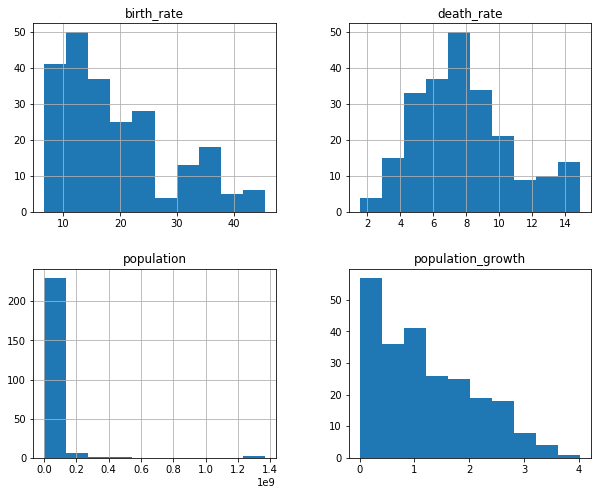

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
hist_query = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(hist_query, conn).hist(ax=ax)
plt.grid(b=None)
plt.show()